In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.Model import Model

from helpers.constants import NOISE_LEVEL_1, NOISE_LEVEL_2, NOISE_LEVEL_3, TARGET_PATTERNS

true_y = np.array(list(range(31)))

tests = [
    np.array(TARGET_PATTERNS['x']).reshape(-1, 7*5),    # Ideal Data (No Noise)
    np.array(NOISE_LEVEL_1['x']).reshape(-1, 7 * 5),    # Noise Level 1
    np.array(NOISE_LEVEL_2['x']).reshape(-1, 7 * 5),    # Noise Level 2
    np.array(NOISE_LEVEL_3['x']).reshape(-1, 7 * 5),    # Noise Level 3
]

save_dir = os.path.abspath('Saves/')

neurons = 20

model_noise_free = Model(num_hidden_nodes=neurons)()
model_noise_free.load_weights(os.path.join(save_dir, f'{neurons}/noise_free_final_weights.hdf5'))

model_noisy = Model(num_hidden_nodes=neurons)()
model_noisy.load_weights(os.path.join(save_dir, f'{neurons}/final_weights.hdf5'))


noise_free_results = []
noisy_results = []

for x in tests:
    _, noise_free_acc = model_noise_free.evaluate(x, true_y)
    noise_free_results.append((1-noise_free_acc) * 100)

    _, noisy_acc = model_noisy.evaluate(x, true_y)
    noisy_results.append((1-noisy_acc)*100)


1/1 [==============================] - 0s 15ms/step - loss: 0.2195 - accuracy: 0.9677


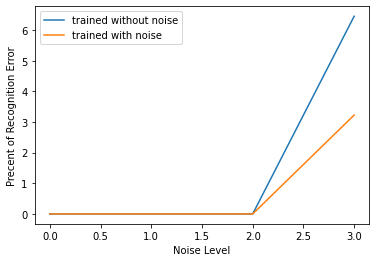

In [2]:
plt.plot(noise_free_results, label='trained without noise')
plt.plot(noisy_results, label='trained with noise', )
plt.ylabel('Precent of Recognition Error')
plt.xlabel('Noise Level')
plt.legend()
plt.show()
